In [1]:
from pickle import load
from src.viz import viz_partition
from src.clustering import louvain_partition_signed_graph

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [2]:
with open('./data/Portland_D4.pkl', 'rb') as file:
    loaded = load(file)
boost_d4 = loaded['boost']
profile_D4 = loaded['profile']

In [8]:
part_green_diag, mod_green_diag = louvain_partition_signed_graph(boost_d4, profile_D4, 
                                                                iter = 7000, score = 'green_diagonal')

In [9]:
mod_green_diag

np.float64(0.4043403746618411)

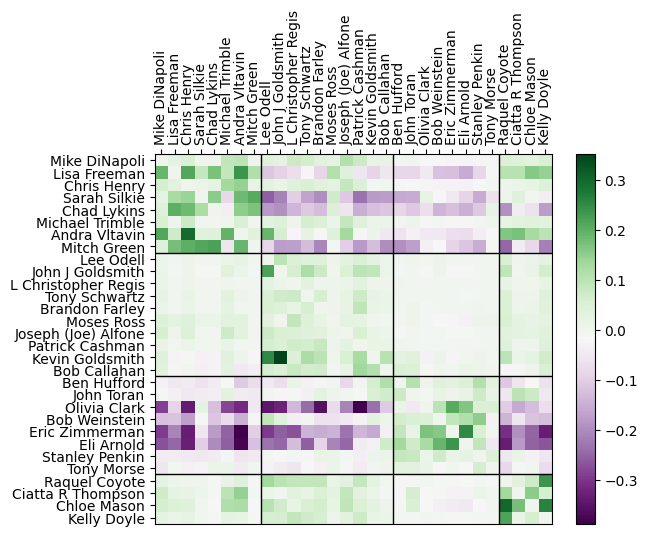

In [10]:
viz_partition(part_green_diag, boost_d4, list(profile_D4.candidates))

In [13]:
part_make_good, make_good_score = louvain_partition_signed_graph(boost_d4, profile_D4, 
                                                                iter = 700, score = 'make_good')

In [14]:
make_good_score

np.float64(1300.1407526195362)

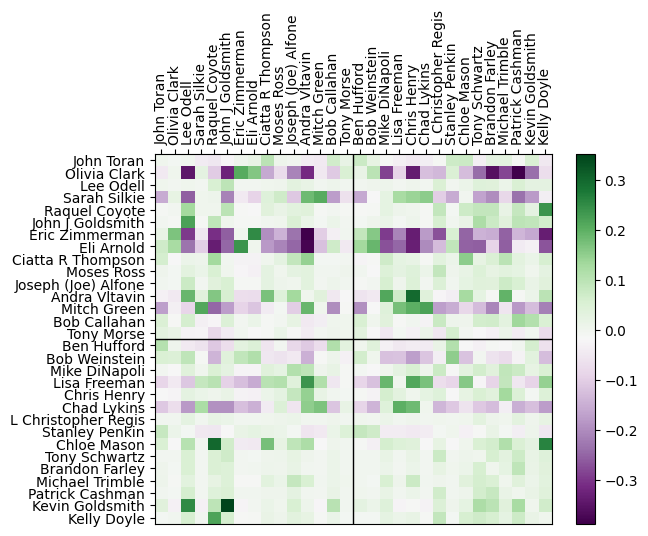

In [15]:
viz_partition(part_make_good, boost_d4, list(profile_D4.candidates))

In [35]:
part_hybrid, hybrid_modularity = louvain_partition_signed_graph(boost_d4, profile_D4, 
                                                                iter = 7000, score = 'hybrid')

In [36]:
hybrid_modularity

np.float64(0.40514033442197883)

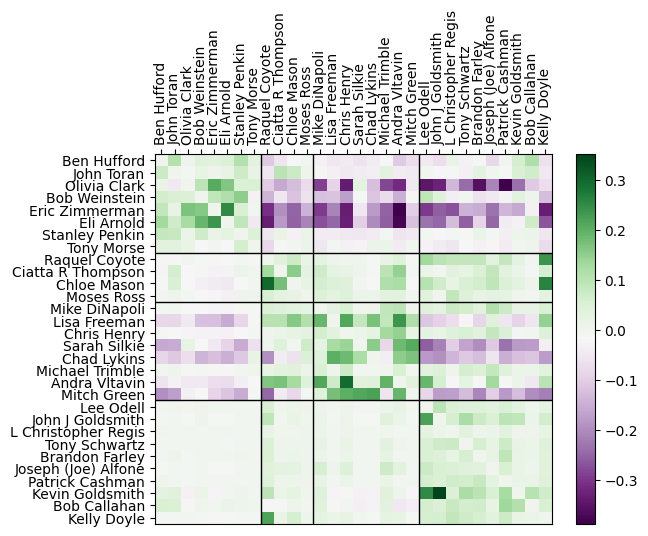

In [37]:
viz_partition(part_hybrid, boost_d4, list(profile_D4.candidates))